In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

- En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:
📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

In [3]:
df = pd.read_csv('../FILES/attacks_limpio_2.csv', index_col = 0)

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [4]:
plt.rcParams["figure.figsize"] = (10,8)


2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

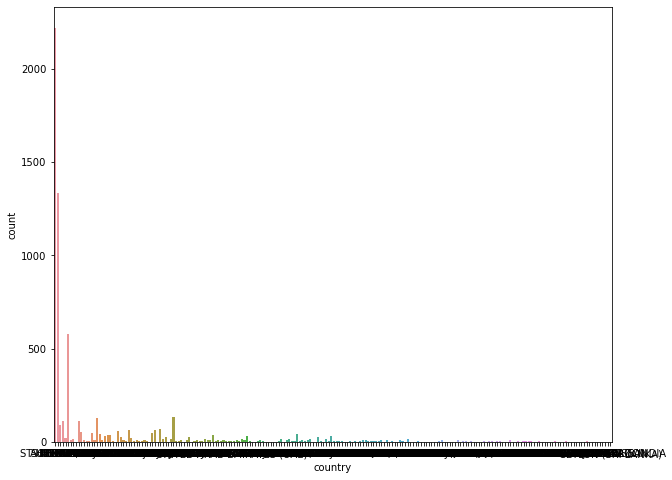

In [ ]:
# 2 variables categoricas, utilizamos countplot
sns.countplot(x = 'country', data = df); 

Como podemos observar nose ve nada

In [5]:
# No se puede identificar los países, intentamos con los 10 países con más ataques creando una serie con lo 10 valores con mas ataques 
# #sacados con el value counts
países_10 = df['country'].value_counts().iloc[:10]
países_10 

usa                 2233
australia           1343
south africa         579
papua new guinea     134
new zealand          127
brazil               112
bahamas              109
mexico                89
italy                 72
fiji                  65
Name: country, dtype: int64

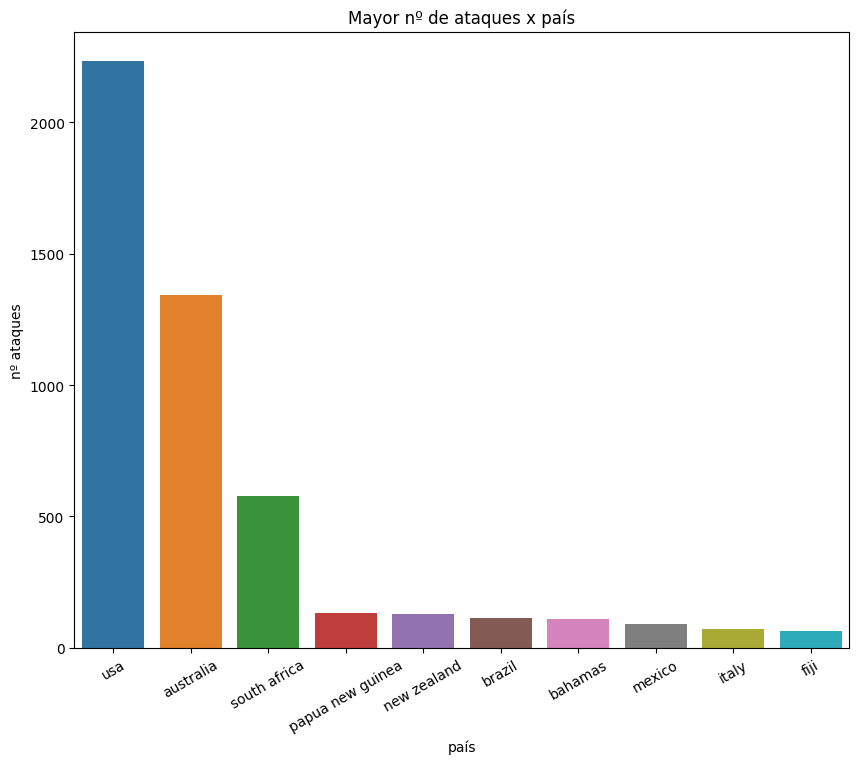

In [7]:
# hemos utilizado la serie de los 10 paises con mas ataques, y con parametro order filtramos y ordenamos por los indices de la serie
fig = sns.countplot(x = 'country' , order = países_10.index, data = df)
plt.title('Mayor nº de ataques x país')
fig.set(xlabel = 'país', ylabel = 'nº ataques')
plt.xticks(rotation = 30);

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

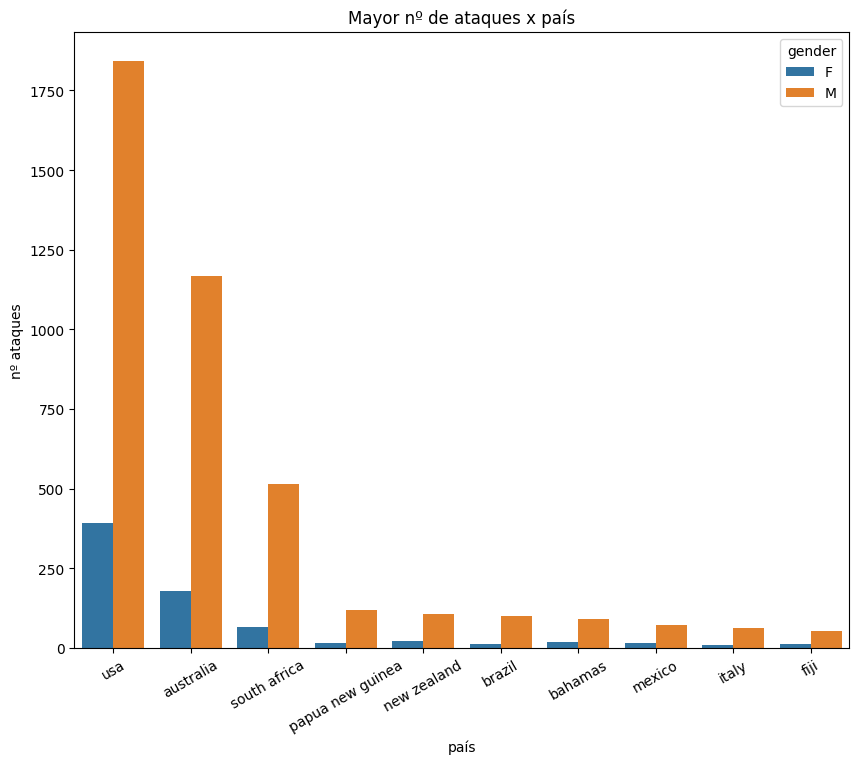

In [8]:
# repetimos el grafico anterior añadindo el hue = gender
fig = sns.countplot(x = 'country' , order = países_10.index, data = df, hue = 'gender')
plt.title('Mayor nº de ataques x país')
fig.set(xlabel = 'país', ylabel = 'nº ataques')
# rotacion... nos falta
plt.xticks(rotation = 30);

Vemos que es comun a todos ataques en los 10 países con mas alto nº de ataques que las victimas son hombres,
con una grande diferencia en relación a las mujeres.

 - ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [9]:
df_copy = df

In [10]:
df_copy['age'].unique()

array([57., 11., 48., nan, 18., 52., 15., 12., 32., 10., 21., 34., 30.,
       60., 33., 29., 54., 41., 37., 56., 19., 25., 69., 38., 55., 35.,
       46., 45., 14., 40., 28., 20., 24., 26., 49., 22.,  7., 31., 17.,
       13., 42.,  3.,  8., 50., 16., 82., 73., 68., 51., 39., 58., 47.,
       61., 65., 36., 66., 43.,  9., 72., 59.,  6., 27., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

In [14]:
# definimos 4 intervalos

df_copy['age_bins'] = pd.cut( df_copy['age'], 4 ,labels = ["niños","jovenes","adultos","senior"])

In [15]:
df_copy.head() 

,case_number,year,type,country,activity,age,species_,month,fatal,gender,age_bins
0,2018.06.25,2018,Boating,usa,Paddling,57.0,White,Jun,n,F,adultos
1,2018.06.18,2018,Unprovoked,usa,Standing,11.0,Unknown,Jun,n,F,niños
2,2018.06.09,2018,Invalid,usa,Surfing,48.0,Unknown,Jun,n,M,adultos
3,2018.06.08,2018,Unprovoked,australia,Surfing,NaN,Unknown,Jun,n,M,NaN
4,2018.06.04,2018,Provoked,mexico,Free diving,NaN,Tiger,Jun,n,M,NaN


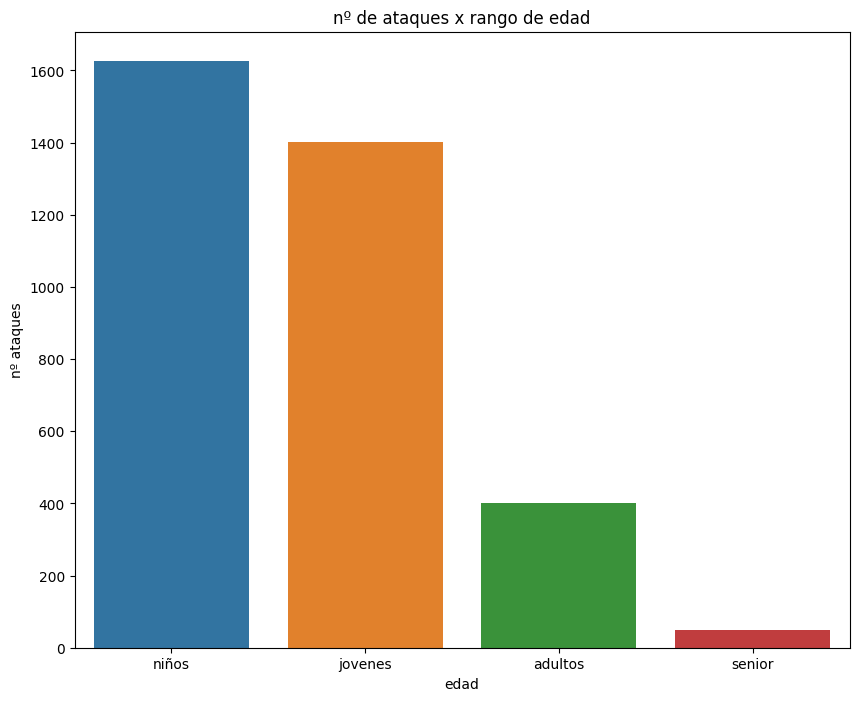

In [16]:
fig = sns.countplot(x  = 'age_bins', data = df_copy) 
plt.title('nº de ataques x rango de edad')
fig.set(xlabel = 'edad', ylabel = 'nº ataques');

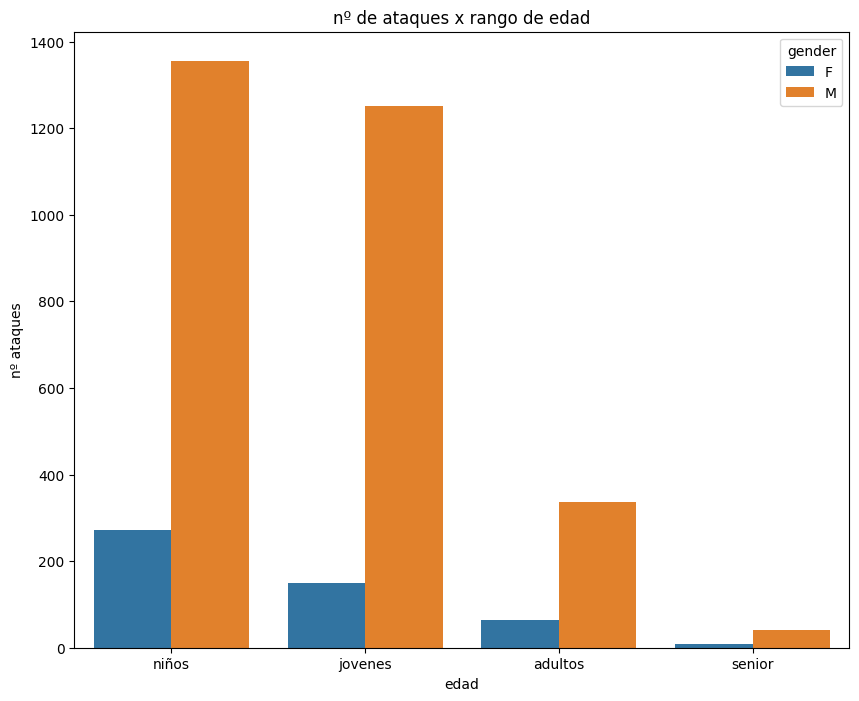

In [18]:
fig = sns.countplot(x  = 'age_bins', data = df_copy, hue = "gender" ) 
plt.title('nº de ataques x rango de edad')
fig.set(xlabel = 'edad', ylabel = 'nº ataques');

Si comprobamos que los ataques son mas a hombres

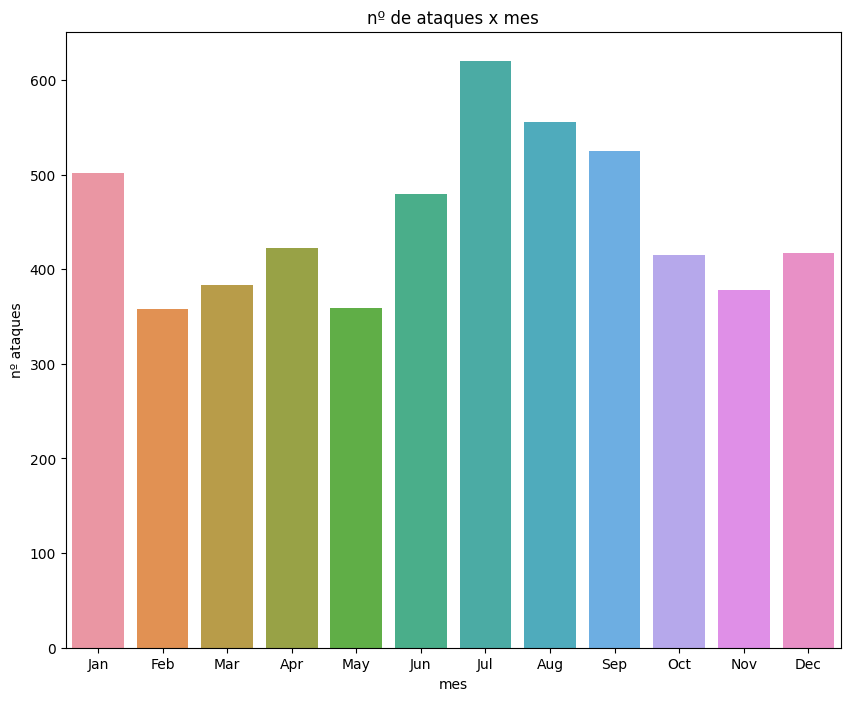

In [20]:
fig = sns.countplot(x  = 'month', data = df_copy,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] ) 
plt.title('nº de ataques x mes')
fig.set(xlabel = 'mes', ylabel = 'nº ataques');

Los meses más calidos son donde mas ataques  ocurren